In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

[0.11108075 0.11156149 0.04265495 0.01768641 0.2147471  0.07639223
 0.11268823 0.14474506 0.02354601 0.03360168 0.1112961 ]


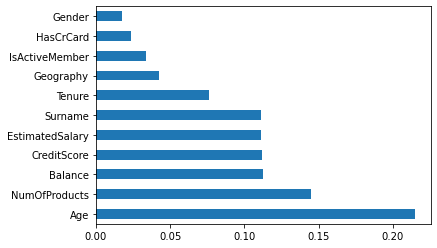

              Specs         Score
6           Balance  1.138847e+06
10  EstimatedSalary  2.875829e+03
4               Age  8.533788e+02
0           Surname  3.277340e+02
9    IsActiveMember  9.725211e+01
3            Gender  3.961496e+01
1       CreditScore  2.738927e+01
2         Geography  1.183651e+01
7     NumOfProducts  4.237053e+00
5            Tenure  7.111131e-01
8         HasCrCard  1.070984e-01


" all_classes=train_data['Exited']\nall_inputs=train_data.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)\nall_inputs['Geography']=le.fit_transform(all_inputs['Geography'])\nall_inputs['Gender']=le.fit_transform(all_inputs['Gender'])\n\n#split\n(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.8, random_state=42,stratify=all_classes) "

In [83]:
le=LabelEncoder()
train_data=pd.read_csv('train.csv')#8000 rows
test_data=pd.read_csv('test.csv')

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

y = train_data['Exited'] 
train_data=train_data.drop(['RowNumber','CustomerId','Exited'],axis=1)
train_data['Surname']=le.fit_transform(train_data['Surname'])
train_data['Geography']=le.fit_transform(train_data['Geography'])
train_data['Gender']=le.fit_transform(train_data['Gender'])
X = train_data.iloc[:,0:11]  #independent columns
   #target column i.e price range

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()



#print(y)
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=11)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.sort_values(by='Score',ascending=False))  #print 10 best features




""" all_classes=train_data['Exited']
all_inputs=train_data.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)
all_inputs['Geography']=le.fit_transform(all_inputs['Geography'])
all_inputs['Gender']=le.fit_transform(all_inputs['Gender'])

#split
(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.8, random_state=42,stratify=all_classes) """

In [3]:
le=LabelEncoder()
train_data=pd.read_csv('train.csv')#8000 rows
test_data=pd.read_csv('test.csv')

all_classes=train_data['Exited']
all_inputs=train_data.drop(['RowNumber','CustomerId','Exited','Surname'],axis=1)
all_inputs['Geography']=le.fit_transform(all_inputs['Geography'])
all_inputs['Gender']=le.fit_transform(all_inputs['Gender'])
#all_inputs['Surname']=le.fit_transform(all_inputs['Surname'])

#split
(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.8, random_state=42,stratify=all_classes)

In [11]:
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV
cls=BalancedRandomForestClassifier(max_depth=5,n_estimators=250,class_weight='balanced_subsample')
'''RF_param = {"n_estimators":[200,250,300,350,400],"max_depth":[5,10,15],"class_weight":['balanced_subsample']}
GSCV = GridSearchCV(cls,param_grid=RF_param,cv=5)
GSCV.fit(train_inputs,train_classes)
print("The best model param :",GSCV.best_params_)'''

cls.fit(train_inputs,train_classes)
prediction=cls.predict(test_inputs)
print(accuracy_score(prediction,test_classes),precision_score(prediction,test_classes),f1_score(prediction,test_classes))

0.7675 0.7239263803680982 0.5592417061611374


In [12]:
from imblearn.ensemble import EasyEnsembleClassifier
cls=EasyEnsembleClassifier(n_estimators=200)
cls.fit(train_inputs,train_classes)
prediction=cls.predict(test_inputs)
print(accuracy_score(prediction,test_classes),precision_score(prediction,test_classes),f1_score(prediction,test_classes))

0.760625 0.7423312883435583 0.558246828143022


In [13]:
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
cls=RandomForestClassifier(n_estimators=350,class_weight={0:85,1:15})
'''RF_param = {"n_estimators":[100,150,200,250,300,350,400,450,500],"max_depth":[5,10,15,20],"class_weight":['balanced_subsample']}
GSCV = GridSearchCV(cls,param_grid=RF_param,cv=5)
GSCV.fit(train_inputs,train_classes)
print("The best model param :",GSCV.best_params_)'''
cls.fit(train_inputs,train_classes)
prediction=cls.predict(test_inputs)
print(accuracy_score(prediction,test_classes),precision_score(prediction,test_classes),f1_score(prediction,test_classes))

0.848125 0.4447852760736196 0.5440900562851783


In [8]:
test_all=test_data.drop(['RowNumber','CustomerId','Surname'],axis=1)
test_all['Geography']=le.fit_transform(test_all['Geography'])
test_all['Gender']=le.fit_transform(test_all['Gender'])
result=pd.DataFrame(columns=['RowNumber','Exited'])
result['RowNumber']=test_data['RowNumber']
prediction=cls.predict(test_all)
result['Exited']=prediction
result.to_csv("result2.csv")

In [56]:
#far form linear 
from sklearn.linear_model import LogisticRegression
cls=LogisticRegression(random_state=42)
cls.fit(train_inputs,train_classes)
prediction=cls.predict(test_inputs)
print(accuracy_score(prediction,test_classes),precision_score(prediction,test_classes),f1_score(prediction,test_classes))

0.78625 0.04294478527607362 0.07567567567567568


In [58]:

cls=DecisionTreeClassifier()
cls.fit(train_inputs,train_classes)
prediction=cls.predict(test_inputs)
print(accuracy_score(prediction,test_classes),precision_score(prediction,test_classes),f1_score(prediction,test_classes

SyntaxError: unexpected EOF while parsing (<ipython-input-58-1bd38de54d41>, line 4)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from itertools import combinations
temp=train_data.drop(['RowNumber','CustomerId','Exited'],axis=1)
temp['Geography']=le.fit_transform(temp['Geography'])
temp['Gender']=le.fit_transform(temp['Gender'])
temp['Surname']=le.fit_transform(temp['Surname'])
sum=0
best_column=[]
for i in range(1,len(temp.columns)):
    result=combinations(temp.columns,i)
    result=[list(x) for x in result]
    for j in result:
        temp2=temp.drop(j,axis=1)
        (train_inputs, test_inputs, train_classes, test_classes) = train_test_split(temp2, all_classes, train_size=0.8, random_state=42,stratify=all_classes)
        cls=RandomForestClassifier(random_state=42)
        cls.fit(train_inputs,train_classes)
        prediction=cls.predict(test_inputs)
        if(accuracy_score(prediction,test_classes)+precision_score(prediction,test_classes)+f1_score(prediction,test_classes)>sum):
            sum=accuracy_score(prediction,test_classes)+precision_score(prediction,test_classes)+f1_score(prediction,test_classes)
            best_column=temp2.columns
        #print(accuracy_score(prediction,test_classes),precision_score(prediction,test_classes),f1_score(prediction,test_classes))
print(sum,best_column)

#cls=RandomForestClassifier(random_state=42)
#cls.fit(train_inputs,train_classes)
#prediction=cls.predict(test_inputs)
#print(accuracy_score(prediction,test_classes),precision_score(prediction,test_classes),f1_score(prediction,test_classes))

1.9338227850159337 Index(['CreditScore', 'Geography', 'Age', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember'],
      dtype='object')


In [59]:
from sklearn.svm import SVC
cls=SVC(kernel='poly',random_state=42)
cls.fit(train_inputs,train_classes)
prediction=cls.predict(test_inputs)
print(accuracy_score(prediction,test_classes),precision_score(prediction,test_classes),f1_score(prediction,test_classes))

KeyboardInterrupt: 

In [60]:
from sklearn.neighbors import KNeighborsClassifier
cls=KNeighborsClassifier(n_neighbors=20)
cls.fit(train_inputs,train_classes)
prediction=cls.predict(test_inputs)
print(accuracy_score(prediction,test_classes),precision_score(prediction,test_classes),f1_score(prediction,test_classes))

0.794375 0.006134969325153374 0.012012012012012012


In [17]:
from sklearn.naive_bayes import GaussianNB
cls=GaussianNB()
cls.fit(train_inputs,train_classes)
prediction=cls.predict(test_inputs)
print(accuracy_score(prediction,test_classes),precision_score(prediction,test_classes),f1_score(prediction,test_classes))

0.7829166666666667 0.0836734693877551 0.1359867330016584


In [14]:
from sklearn.neural_network import MLPClassifier
cls=MLPClassifier(random_state=1)
cls.fit(train_inputs,train_classes)
prediction=cls.predict(test_inputs)
print(accuracy_score(prediction,test_classes),precision_score(prediction,test_classes),f1_score(prediction,test_classes))

0.465 0.6380368098159509 0.32704402515723274


In [86]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
# 建立 XGBClassifier 模型
cls= XGBClassifier(random=42)
""" param_dist = {
        'n_estimators':range(80,200,4),
        'max_depth':range(2,15,1),
        'learning_rate':np.linspace(0.01,2,20),
        'subsample':np.linspace(0.7,0.9,20),
        'colsample_bytree':np.linspace(0.5,0.98,10),
        'min_child_weight':range(1,9,1)
        }
grid = RandomizedSearchCV(cls,param_dist,cv = 3,n_iter=10,n_jobs = 1) """
# 使用訓練資料訓練模型
cls.fit(train_inputs,train_classes)
# 使用訓練資料預測分類
prediction = cls.predict(test_inputs)
print(accuracy_score(prediction,test_classes),precision_score(prediction,test_classes),f1_score(prediction,test_classes))

C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:54:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "random" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:54:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.82 0.3895705521472393 0.46863468634686345
